In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

import nltk
import nltk.stem
import nltk.corpus 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [205]:
df = pd.read_csv(r'./data/news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [206]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [207]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


### **Required**
#### Run One time

In [208]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 

In [209]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

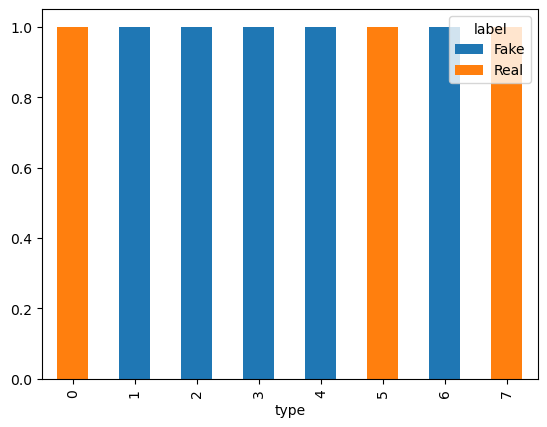

In [210]:
plot_bar(df,'type' , 'label')
plt.show()

### **Required**

In [211]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
Daniel Greenfield,2016-11-01T23:56:39.599+02:00,hillary already planning fireworks for victory...,lloyd billingsley \npresidential debates betwe...,english,frontpagemag.com,http://www.frontpagemag.com/sites/default/file...,5,Real,james comey change outcome election,netanyahus critical foreign tour israels strat...,1.0
No Author,2016-11-08T16:05:09.711+02:00,video women on the street explain why they hat...,donna brazile the corrupt head of the democrat...,english,dailywire.com,http://www.dailywire.com/sites/default/files/s...,0,Real,video women street explain hate hillary daily ...,donna brazile corrupt head democratic national...,1.0
Buck Rogers,2016-10-27T17:51:10.531+03:00,comment on gold medalist wrestler gets violent...,this proves that even though the power elites ...,english,thefreethoughtproject.com,http://thefreethoughtproject.com/wp-content/up...,3,Fake,hillary entire obama administration exposed us...,agreed,1.0
Isabelle Z.,2016-10-27T11:36:36.145+03:00,std infection rates reach alltime high in the ...,scandal epa could have issued an emergency ord...,english,naturalnews.com,http://www.naturalnews.com/gallery/640/Technol...,6,Fake,new video break cycle human complacency servitude,dilbert creator scott adams endorses trump say...,1.0
No Author,2016-11-05T01:09:27.580+02:00,life steps to rolling the perfect joint,email \nthe president has to be kicking himsel...,english,clickhole.com,http://images.onionstatic.com/clickhole/3440/7...,4,Fake,life steps rolling perfect joint,email president kicking one term office comes ...,1.0


In [303]:
y = df1['label']
x = df1.loc[:, ['site_url','text_without_stopwords']]
x['source'] = x["text_without_stopwords"]
x = x.drop(['site_url', 'text_without_stopwords'], axis=1)
x = x.source
y

author
Daniel Greenfield                      Real
No Author                              Real
Buck Rogers                            Fake
Isabelle Z.                            Fake
No Author                              Fake
                                       ... 
South Front                            Fake
The angel of light                     Fake
noreply@blogger.com (Der Postillon)    Fake
Steve Watson                           Fake
No Author                              Fake
Name: label, Length: 2045, dtype: object

In [304]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)

print(x_test)
print(tfidf_train.shape)

author
EdJenner                         tuesday night scenario occurred four times ame...
Nathaniel Mauka                  nanny jail force feeding baby death shares ike...
Anonymous                        people time dont know fix corruption httpwwwfr...
No Author                        email knowledge power put pork slice see makes...
Daniel Greenfield                nigerian novelist wonders everyone loves hilla...
                                                       ...                        
No Author                        reply today pm part mother child worship https...
admin                            merit taking cynical view life observations cy...
David Gutierrez, staff writer    leaked email shows monsanto executive vp invit...
Gillian                          rÃ©union du conseil de sÃ©curitÃ© du octobre d...
Twain Yobra                      keywords alzhemiers disease anxiety dementia d...
Name: source, Length: 614, dtype: object
(1431, 37915)


In [305]:
tfidf_train.shape

(1431, 37915)

In [306]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.682


In [307]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)


accuracy:  0.757


In [308]:
y_pred3

array(['Real', 'Fake', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Real',
       'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Real', 'Fake', 'Fake',
       'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake',
       'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake',
       'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Fake',
       'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Real',
       'Real', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake',
       'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake',
       'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real',
       'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Fake', 'Real',
       'Real', 'Fake', 'Fake', 'Fake', 'Real', 'Fake', 'Real', 'Real',
       'Fake', 'Real', 'Fake', 'Real', 'Real', 'Real', 'Real', 'Fake',
       'Real', 'Real', 'Real', 'Fake', 'Real', 'Real', 'Fake', 'Real',
       'Real', 'Fake', 'Fake', 'Real', 'Fake', 'Fake', 'Real', 'Real',
      

In [309]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [310]:
def preprocess_text(text):

    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    # Tokenize the text into words
    words = word_tokenize(text.lower())

    words = [word for word in words if word not in string.punctuation]

    # Remove stop words
    stop_words = stopwords.words('english')
    words = [word for word in text.split() if word not in (stop_words)]
    words = " ".join([word for word in words if word.isalpha()]).lower()    
    
    return words


In [312]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

URL = "https://www.dailywire.com/news/hanging-with-president-big-guy-and-his-national-intelligence-leaders"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

text = []
parsed_url = urlparse(URL).netloc
base_url = parsed_url[4:]

# Find all <p> elements and print their text
for paragraph in soup.find_all('p'):
    text.append(preprocess_text(paragraph.get_text()))

# final = "bbc.com " + processed_text
print(text)



['the daily wire exclusively obtained newsletter office joe bidens national intelligence director joe biden hes sometimes called the big guy course rhododendron currently running free world behalf chinese fair since theyve paid bundle bribes his director national intelligence avril haines whose pronouns wang tsi co mao soy fang fang chu served cia director john brennan communist president barack obama antiamerican globalist', 'but worry confirmation hearing dni fang fang reassured congress areas wanted cooperate chinese like collecting the big guys money depositing one twenty shell companies plausible deniability hes handing border mexican cartels kill americans fentanyl launder profits chinese mafia inside us', 'what i talking oh yeah', 'according the daily wires crack investigative reporter spencer crack dni fang fangs office puts newsletter called the dive dive guides fbi cia nsa matters diversity equity inclusion dei intelligence officers better keep america free untraceable bankin

In [313]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(text)
print(tfidf_test)

  (0, 36999)	0.0658412014170466
  (0, 36823)	0.13865021759483456
  (0, 36154)	0.2010783401736613
  (0, 33455)	0.12221496105049949
  (0, 31187)	0.2010783401736613
  (0, 29918)	0.11670221455158339
  (0, 28779)	0.09468516173914826
  (0, 26183)	0.2010783401736613
  (0, 25787)	0.06350394932767822
  (0, 23986)	0.10557106200775922
  (0, 23238)	0.08507115446198574
  (0, 23149)	0.127467159616519
  (0, 23048)	0.07751745539718523
  (0, 22460)	0.1121396553122886
  (0, 22116)	0.15208419378821758
  (0, 20195)	0.18267554503437572
  (0, 17808)	0.08716826686847365
  (0, 17795)	0.23683137569228144
  (0, 17030)	0.21187453897329553
  (0, 15183)	0.09193619592557956
  (0, 14486)	0.11457711097614957
  (0, 13898)	0.14274285976521892
  (0, 12985)	0.08102656591790701
  (0, 11869)	0.36535109006875144
  (0, 11770)	0.11783215619647816
  :	:
  (13, 32881)	0.2329707099944617
  (13, 29121)	0.5225698290256412
  (13, 23442)	0.35405243133279
  (13, 21504)	0.5225698290256412
  (13, 11343)	0.39341896418976535
  (13, 1344)

In [318]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=100),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
#ABscore = metrics.accuracy_score(y_test,y_pred3)
#print("accuracy: %0.3f" %ABscore)

In [319]:
y_pred3

array(['Real', 'Fake', 'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Real',
       'Real', 'Fake', 'Fake', 'Fake', 'Fake', 'Fake', 'Real', 'Fake'],
      dtype=object)

In [320]:
Rando = RandomForestClassifier(n_estimators=1,random_state=1)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)

In [321]:
y_pred1

array(['Real', 'Real', 'Real', 'Real', 'Fake', 'Real', 'Fake', 'Real',
       'Real', 'Fake', 'Fake', 'Real', 'Real', 'Real', 'Fake', 'Real'],
      dtype=object)